# Two flexible ways to visualize PCA

- **Explained Variance Cumulative Plot:** This is simple but powerful. It immediately tells you how much of the variance in the data is explained by each component and how the combinations of the different components add up to the total variance.

- **Principal Components Overlayed with the Original Data:** This one is my absolute favorite. You can see the progression of how each principal component brings in slightly more information, and in turn, it becomes hard to distinguish between the different components. This plot is a perfect companion to the Explained Variance Cumulative Plot.

## Data Preparation
The dataset we’ll be using is the Wine Data Set from UC Irvine’s Machine Learning repository. The data set contains data about wine quality. This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license.

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

# Load libraries for machine learning
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Load libraries for plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the data
df = pd.read_csv('/content/wine.data')

# Add colunm names to the df
df.columns = ['Class','Alcohol','Malic acid','Ash','Alcalinity o ash','Magnesium','Total phenols',
              'Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity',
              'Hue','OD280/OD315 of diluted wines','Proline']
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity o ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


This particular dataset has 13 features and a target variable named Class we can use for classification. Each of the values is continuous, and therefore we can directly apply PCA to all variables. Normally we would use PCA on a much higher dimensional dataset, but this dataset will show the concepts.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         177 non-null    int64  
 1   Alcohol                       177 non-null    float64
 2   Malic acid                    177 non-null    float64
 3   Ash                           177 non-null    float64
 4   Alcalinity o ash              177 non-null    float64
 5   Magnesium                     177 non-null    int64  
 6   Total phenols                 177 non-null    float64
 7   Flavanoids                    177 non-null    float64
 8   Nonflavanoid phenols          177 non-null    float64
 9   Proanthocyanins               177 non-null    float64
 10  Color intensity               177 non-null    float64
 11  Hue                           177 non-null    float64
 12  OD280/OD315 of diluted wines  177 non-null    float64
 13  Proli

In [4]:
# check for imbalanced data
df['Class'].value_counts()

2    71
1    58
3    48
Name: Class, dtype: int64

This dataset, unlike most, is pretty balanced. We'll leave it as is for this demonstration.

In [22]:
# Create X and y variable 
X = df.drop(columns = ['Class']).copy().values
y = df['Class'].copy().values

In [15]:
X.shape

(177, 13)

In [16]:
y

0      1
1      1
2      1
3      1
4      1
      ..
172    3
173    3
174    3
175    3
176    3
Name: Class, Length: 177, dtype: int64

## Find Explained Variance
- The first step is to find the **explained variance** for each principal component. We calculate explained variance by first scaling our data with the *StandardScalar* and fitting a PCA model to the scaled data.

- The *StandardScalar* is a simple transformation that normalizes the data to have a mean of 0 and 0 unit variance, or a standard deviation of 1.

- You will also notice that the total number of *Principal Components equals the number of features in your dataset*. However, one important thing to note is that the Principal Components are not the dataset’s columns; rather, PCA is constructing new features that best explain the data.

In [8]:
def get_variance(X,n):
  scaler = StandardScaler()
  pca = PCA(n_components = n)
  pca.fit(scaler.fit_transform(X))

  return pca.explained_variance_ratio_.cumsum()[-1:] # return the value except the last one

for i in range(1,14):
  print('Components:\t', i, '=\t', get_variance(X, i), '\tCumulative Variance')

Components:	 1 =	 [0.35983071] 	Cumulative Variance
Components:	 2 =	 [0.5522435] 	Cumulative Variance
Components:	 3 =	 [0.6640381] 	Cumulative Variance
Components:	 4 =	 [0.73514919] 	Cumulative Variance
Components:	 5 =	 [0.80143663] 	Cumulative Variance
Components:	 6 =	 [0.8510403] 	Cumulative Variance
Components:	 7 =	 [0.89350044] 	Cumulative Variance
Components:	 8 =	 [0.92048035] 	Cumulative Variance
Components:	 9 =	 [0.94272497] 	Cumulative Variance
Components:	 10 =	 [0.96171025] 	Cumulative Variance
Components:	 11 =	 [0.9790518] 	Cumulative Variance
Components:	 12 =	 [0.99200387] 	Cumulative Variance
Components:	 13 =	 [1.] 	Cumulative Variance


Additionally, each of the principal components is summed together, and the total of all components will equal 1. As you look through the list of cumulative variance, you will see that **the first component is the most important and the last component is the least important**; in other words, the first component contributes the most to the variance. As we include more and more of the components, the contribution amount per component starts to decrease. Let's visualize this by plotting the cumulative variance.

## Plot the Threshold for Explained Variance
While the printout of the values is a good start, we can improve by plotting each of these values. Additionally, we will plot a line that represents `95%` of the explained variance. While there is no rule as to how much explained variance you need to include in a model, `95%` is a good threshold to start. Later, we will perform a grid search to find the optimal number of components to use in a model.

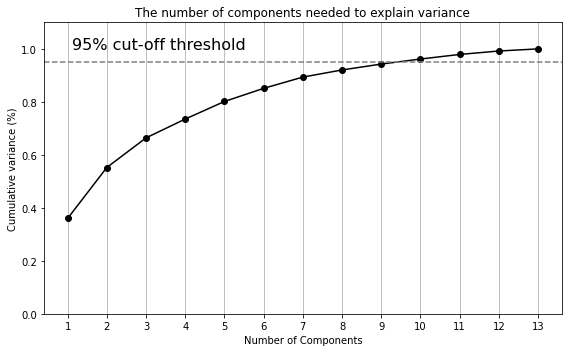

In [9]:
scaler = StandardScaler()
data_rescaled = scaler.fit_transform(X)

pca = PCA().fit(data_rescaled)

plt.rcParams['figure.figsize'] = (8,5)

fig,ax = plt.subplots()
xi = np.arange(1, 14, step = 1) # 13 components in total
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker = 'o', linestyle = '-', color = 'black')

plt.xlabel('Number of Components')
plt.xticks(np.arange(1,14,step = 1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

# Add a threshold line at 95%
plt.axhline(y=0.95, color = 'grey',linestyle ='--')
plt.text(1.1, 1, '95% cut-off threshold', color = 'black', fontsize = 16)

ax.grid(axis = 'x')
plt.tight_layout()
plt.show()

After plotting the cumulative explained variance, we can see how the curve flattens slightly around `6` or `7` components. And where our line is drawn for 95%, the total explained variance is at approximately `9` components. And that is explained variance visualized! Let's move on to plotting the actual components.

## Plotting Each Component vs. Original Data

The next step is to visualize the data resulting from each component: rather than the explained variance. We will use the **inverse_transform** method of the PCA model, and this will take each of the components and transform them back into the original data scale. We will plot the entire range of components from 1-13 and overlay them with the original data.

In [10]:
# Function to perform PCA with n-components
def transform_pca(X, n):
  pca = PCA(n_components=n)
  pca.fit(X)
  X_new = pca.inverse_transform(pca.transform(X))
  return X_new

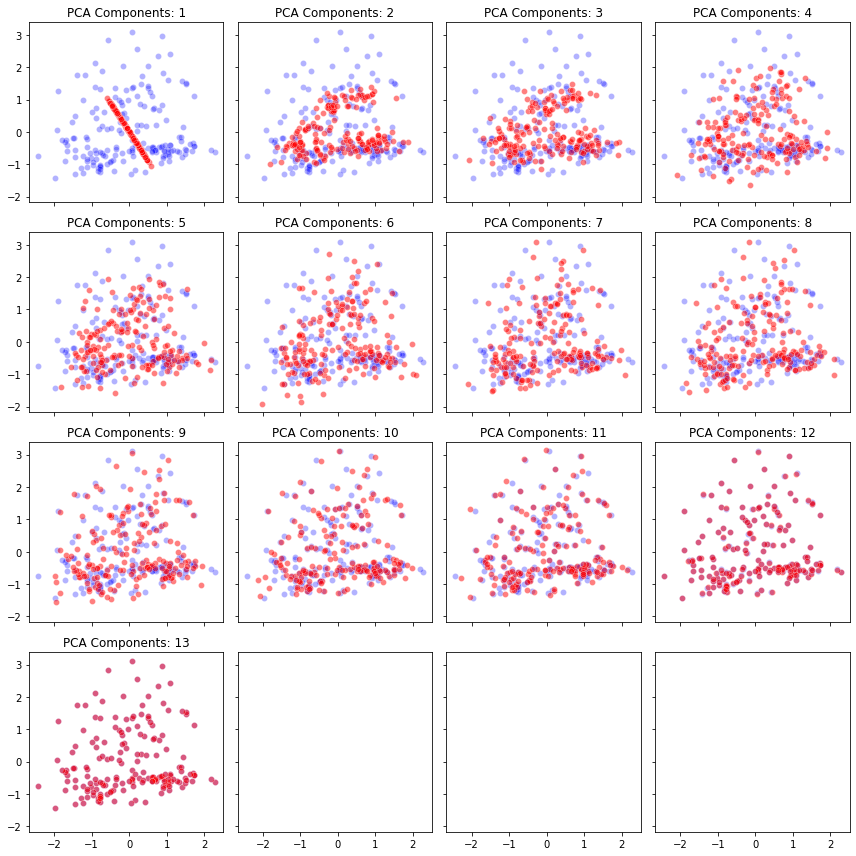

In [11]:
rows = 4
cols = 4
comps = 1

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

fig, axes = plt.subplots(rows, 
                         cols, 
                         figsize=(12,12), 
                         sharex=True, 
                         sharey=True)


for row in range(rows):
    for col in range(cols):
        try:
            X_new = transform_pca(X_scaled, comps) # the orginal data
            ax = sns.scatterplot(x=X_scaled[:, 0], 
                                 y=X_scaled[:, 1], 
                                 ax=axes[row, col], 
                                 color='blue', 
                                 alpha=.3)
            ax = sns.scatterplot(x=X_new[:, 0],  # each PCA component
                                 y=X_new[:, 1], 
                                 ax=axes[row, col], 
                                 color='red',
                                 alpha = .5)
            ax.set_title(f'PCA Components: {comps}');

            comps += 1
        except:
            pass
plt.tight_layout()

With just one component displayed, it takes the form of a set of points projected on a line that goes is along the axis with the most variance in the original data. As more and more components are added, we can see how the data starts to resemble the original data even though there is less information being displayed. By the time we get into the upper values, the data starts to match the original data where finally, at all 13 components, it is the same as the original.

# Comparing PCA AND Non-PCA Classification Models
Let’s run three classifiers against our dataset, both with and without PCA applied, and see how they perform. We’ll compare them utilizing only the first two components ( n_components=2) to make it interesting. We'll compare **KNeighborsClassifier**, **RandomForestClassifier**, and **LogisticRegression** as our classifiers and see how they perform.


As always, we’ll use a **pipeline** to combine our data preprocessing and PCA into a single step. We’ll scale our data with the same StandardScaler we used previously and then fit the data with a certain number of components. Since we'll use this function a few times in our workflow, we've set it up to be flexible.

In [12]:
def create_pipe(clf, do_pca=False, n=2):

    scaler = StandardScaler()
    pca = PCA(n_components=n)

    if do_pca == True:
        combined_features = FeatureUnion([("scaler", scaler), 
                                          ("pca", pca)])
    else:
        combined_features = FeatureUnion([("scaler", scaler)])

    pipeline = Pipeline([("features", combined_features), 
                         ("clf", clf)])


    return pipeline

Next is looping over the different classifiers and performing **Cross-Validation**. As mentioned, we’ll try three different classifiers and test them each with and without PCA applied.

In [24]:
models = {'KNeighbors' : KNeighborsClassifier(),
          'RandomForest' : RandomForestClassifier(random_state=42),
          'LogisticReg' : LogisticRegression(random_state=42),
          }


def run_models(with_pca):
    for name, model, in models.items():
        clf = model
        pipeline = create_pipe(clf, do_pca = with_pca, n=2)
        scores = cross_val_score(pipeline, X, 
                                 y, 
                                 scoring='accuracy', 
                                 cv=3, n_jobs=1, 
                                 error_score='raise')
        print(name, ': Mean Accuracy: %.3f and Standard Deviation: \
             (%.3f)' % (np.mean(scores), np.std(scores)))

print(68 * '-')
print('Without PCA')
print(68 * '-')
run_models(False)
print(68 * '-')
print('With PCA')
print(68 * '-')
run_models(True)
print(68 * '-')

--------------------------------------------------------------------
Without PCA
--------------------------------------------------------------------
KNeighbors : Mean Accuracy: 0.949 and Standard Deviation:              (0.024)
RandomForest : Mean Accuracy: 0.972 and Standard Deviation:              (0.021)
LogisticReg : Mean Accuracy: 0.972 and Standard Deviation:              (0.021)
--------------------------------------------------------------------
With PCA
--------------------------------------------------------------------
KNeighbors : Mean Accuracy: 0.678 and Standard Deviation:              (0.048)
RandomForest : Mean Accuracy: 0.955 and Standard Deviation:              (0.021)
LogisticReg : Mean Accuracy: 0.972 and Standard Deviation:              (0.029)
--------------------------------------------------------------------


# Find the Optimal Number of Components
For this portion, we’ll use the train_test_split function to split the dataset into 70/30% partitions and then use the GridSearch feature to find optimal parameters. The most critical parameter we want to validate is the performance of various **PCA component numbers**.

As we saw from the scatterplots above, when we approach higher numbers like 9, the dataset after transformation looks a lot like the original with 95% of the variation explained by the transformed dataset. We also saw how only 2 components performed well, so we can test the entire range from 1-13 and find the best setting.

In [25]:
# Make training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 53)

### Hyperparameter Tuning
After selecting the model based on cross-validation utilizing default parameters, we perform a **Grid Search** to fine-tune the model and select the best parameters. We'll loop over three things.

In [26]:
def get_params(parameters, X, y, pipeline):

    grid = GridSearchCV(pipeline, 
                        parameters, 
                        scoring='accuracy', 
                        n_jobs=1, 
                        cv=3, 
                        error_score='raise')
    grid.fit(X, y)

    return grid
clf = LogisticRegression(random_state=41)
pipeline = create_pipe(clf, do_pca=True)

param_grid = dict(features__pca__n_components = list(range(2,14)),
                 clf__C = [0.1, 1.0, 10, 100],
                 clf__solver = ['liblinear', 'saga'],
                 clf__penalty = ['l2', 'l1'])

grid = get_params(param_grid, X_train, y_train, pipeline)

print("Best cross-validation accuracy: {:.3f}".format(grid.best_score_))
print("Test set score: {:.3f}".format(grid.score(X_test, y_test))) 
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.976
Test set score: 1.000
Best parameters: {'clf__C': 10, 'clf__penalty': 'l1', 'clf__solver': 'liblinear', 'features__pca__n_components': 6}


- We can see that the best parameters are *C=10, penalty='l1', solver='liblinear' and n_components=2*. We can also see that the test set score is close to the best cross-validation score. We can also see that the cross-validation accuracy improved a little from 0.972 to 0.976.

- As a side note, this is pretty typical of Hyperparameter Tuning. You don’t get massive improvements; it’s small, incremental improvements, and the biggest gains are through **feature engineering** and **model selection**.